<a href="https://colab.research.google.com/github/Suyash-28-commits/Machine-Learning-Practice/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']
df.sample(5)

,Class label,Alcohol,Malic acid
168,3,13.58,2.58
24,1,13.50,1.81
92,2,12.69,1.53
107,2,12.72,1.75
127,2,11.79,2.13


<Axes: xlabel='Alcohol', ylabel='Density'>

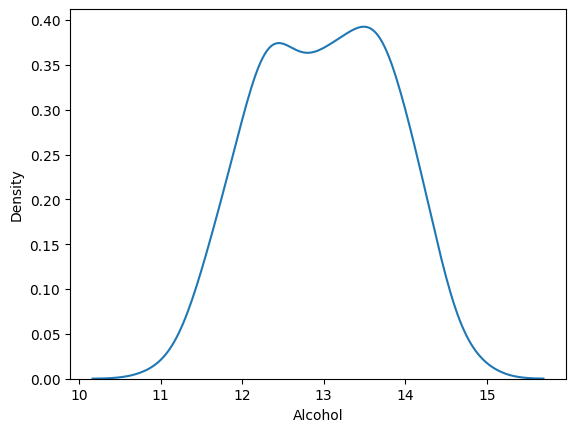

In [ ]:
#Distplot of Alcohol
sns.kdeplot(df["Alcohol"])
#This shows a bimodal distribution -> there are two modes or two peaks

<Axes: xlabel='Class label', ylabel='Density'>

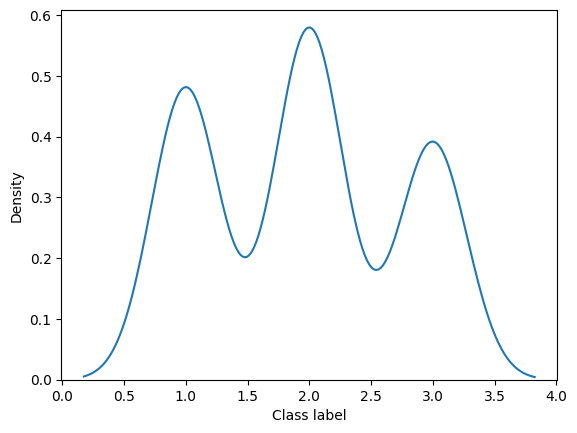

In [ ]:
#Distplot of Class label
sns.kdeplot(df['Class label'])
#Trimodal distribution -> Three modes or three peaks in the distribution

<Axes: xlabel='Malic acid', ylabel='Density'>

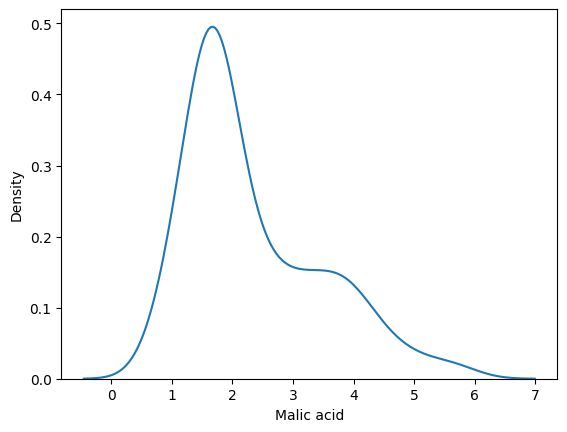

In [ ]:
#Distplot of Malic Acid
sns.kdeplot(df["Malic acid"])
#Sort of Normal Distribution but skewed

In [ ]:
df['Malic acid'].mean()

np.float64(2.3363483146067416)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

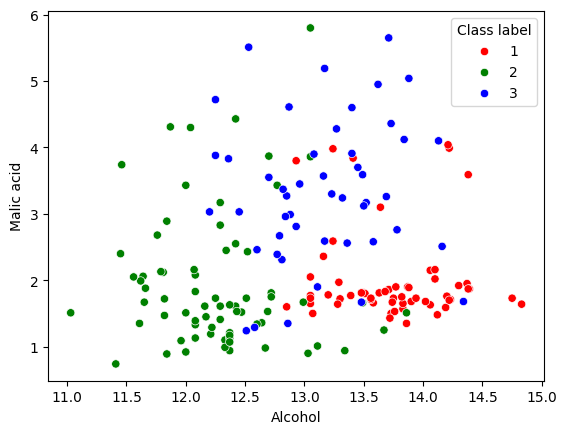

In [ ]:
color_dict ={1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df["Alcohol"],y = df["Malic acid"],hue=df["Class label"],palette =color_dict)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

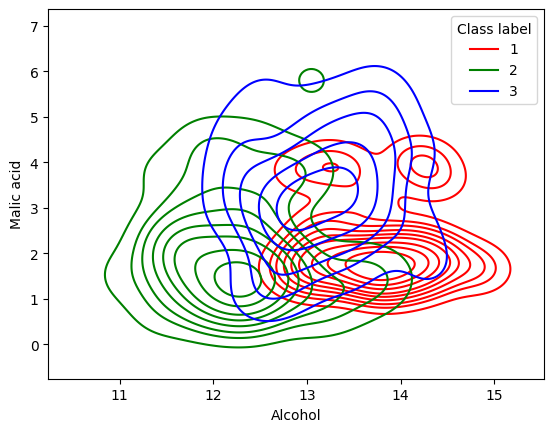

In [ ]:
sns.kdeplot(x=df["Alcohol"],y = df["Malic acid"],hue=df["Class label"],palette =color_dict)

In [ ]:
df["Class label"].value_counts()

,count
Class label,
2,71
1,59
3,48


In [ ]:
df.shape

(178, 3)

In [ ]:
#For Scaling Features whether you're doing Normalization or Standerdization , train test splitting is required
#Performing train-test split on data
from sklearn.model_selection import train_test_split
#Train test split contains two parameters : dataframe without target column and target column itself
X_train,X_test,y_train,y_test = train_test_split(df.drop("Class label",axis=1),df["Class label"],test_size=0.3,random_state=0)
#X_train,X_test are pandas dataframe
#y_train , y_test are pandas Series

X_train.shape , X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit the training data , it will learn the parameters ->min and max of the features (Alcohol and Malic acid)
scaler.fit(X_train)

#Apply transfromation on the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled and X_test_scaled are numpy array / 2D tensors
#whereas y_train and y_test are Pandas Series

In [ ]:
#Converting X_train_scaled , X_test_scaled two pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Malic acid'>

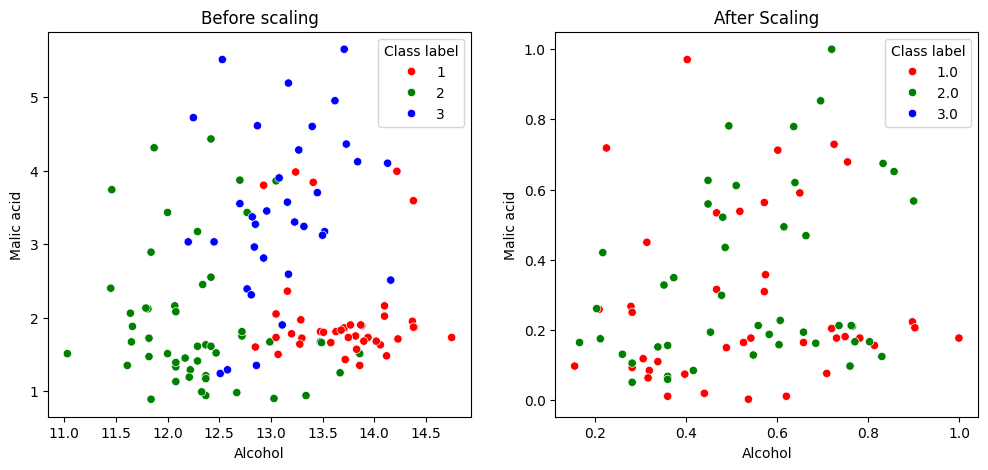

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
sns.scatterplot(x="Alcohol",y="Malic acid",hue=y_train,data=X_train,palette={1:'red',2:'green',3:'blue'},ax=ax1)
ax2.set_title("After Scaling")
sns.scatterplot(x="Alcohol",y="Malic acid",hue=y_train,data=X_train_scaled,palette={1:'red',2:'green',3:'blue'},ax=ax2)
#The whole space is squished down to a unit square in case of 2 features
#If the whole space is 3D , the space will be squished down to a unit cube
#If whole space is 4D , the space will be squised down to a unit hypercube

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

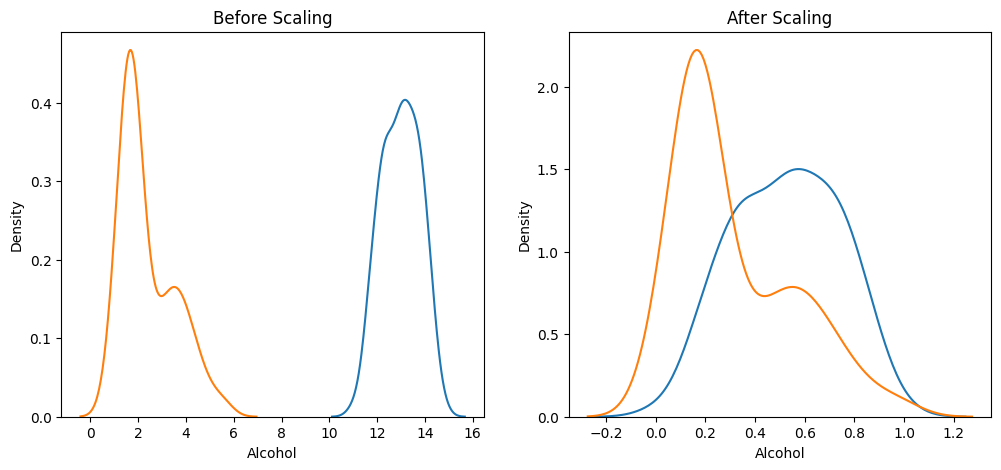

In [ ]:
#KDE plot of after scaling and before scaling
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.set_title("Before Scaling")
ax2.set_title("After Scaling")

#Before Scaling
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train["Malic acid"],ax=ax1)

#After Scaling
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(X_train_scaled["Malic acid"],ax=ax2)

<Axes: title={'center': 'Malic Acid Distribution before Scaling'}, xlabel='Malic acid', ylabel='Density'>

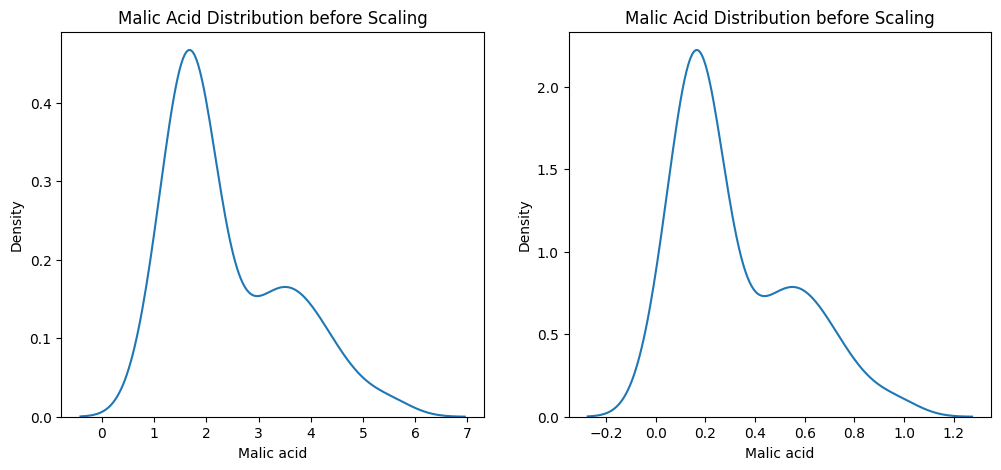

In [ ]:
#Malic acid distribution before scaling
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Malic Acid Distribution before Scaling")
ax2.set_title("Malic Acid Distribution before Scaling")

sns.kdeplot(X_train["Malic acid"],ax=ax1)
sns.kdeplot(X_train_scaled["Malic acid"],ax=ax2)
#Distribition of data remains same even after scaling

<Axes: title={'center': 'Alcohol distribution after scaling'}, xlabel='Alcohol', ylabel='Density'>

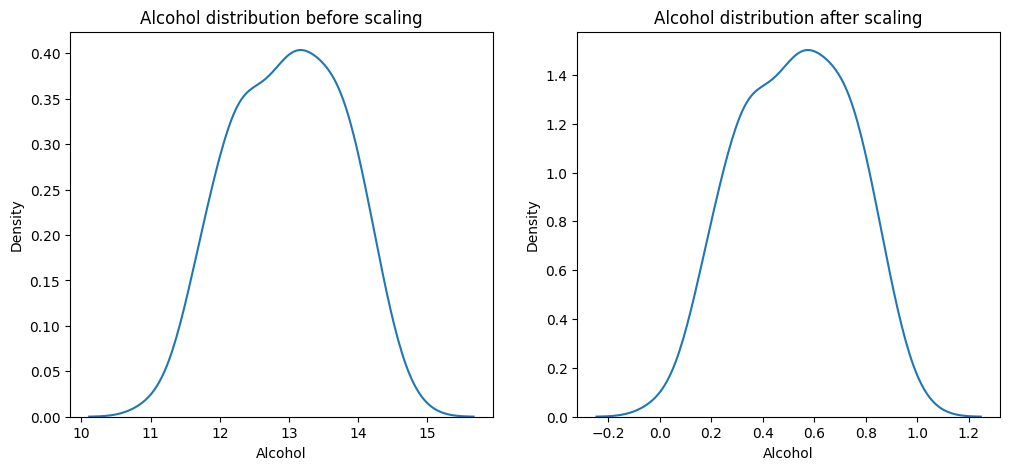

In [ ]:
#Alcohol distribution before Scaling
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Alcohol distribution before scaling")
ax2.set_title("Alcohol distribution after scaling")

sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
#Distribition of data remains same even after scaling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [ ]:
df['Class label'].value_counts()

,count
Class label,
2,71
1,59
3,48


In [ ]:
df.sample(5)

,Class label,Alcohol,Malic acid
66,2,13.11,1.01
80,2,12.00,0.92
38,1,13.07,1.50
124,2,11.87,4.31
13,1,14.75,1.73


In [2]:
import json

# Path to the notebook you want to fix
file_path = "/content/drive/MyDrive/Colab Notebooks/Normalization.ipynb"

# Load the notebook as a JSON object
with open(file_path, "r", encoding="utf-8") as f:
    notebook_data = json.load(f)

# Remove broken widgets from metadata if they exist
if "widgets" in notebook_data.get("metadata", {}):
    print("Fixing metadata.widgets...")
    del notebook_data["metadata"]["widgets"]

# Save the cleaned notebook
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(notebook_data, f, indent=1)

print("Notebook fixed and saved successfully.")

Notebook fixed and saved successfully.
